In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import sys


In [17]:
PROJ_ROOT = '/homes/ar2342/one_more_dir/contextual_frogs/'

In [18]:
paradigms = ['spontaneous','evoked']

dfs = {paradigm:{} for paradigm in paradigms}
for paradigm in paradigms:
    for i in range(1,9):
        dfs[paradigm][i] = pd.read_csv(f'{PROJ_ROOT}/../../frogs_project/data/COIN_data/trial_data_{paradigm}_recovery_participant{i}.csv')


In [19]:
for paradigm in paradigms:
    print(f'\n\n {paradigm}:')
    for name in list(dict.fromkeys(dfs[paradigm][2].BlockName)):
        print(f'trials in block {name}: {sum(dfs[paradigm][2].BlockName == name)}')



 spontaneous:
trials in block Null: 50
trials in block FieldA: 120
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp150: 150


 evoked:
trials in block Null: 50
trials in block FieldA: 120
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp2: 2
trials in block FieldA2: 2
trials in block Clamp150: 146


In [20]:
all_ys ={paradigm:[] for paradigm in paradigms}
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        all_ys[paradigm].append(y)


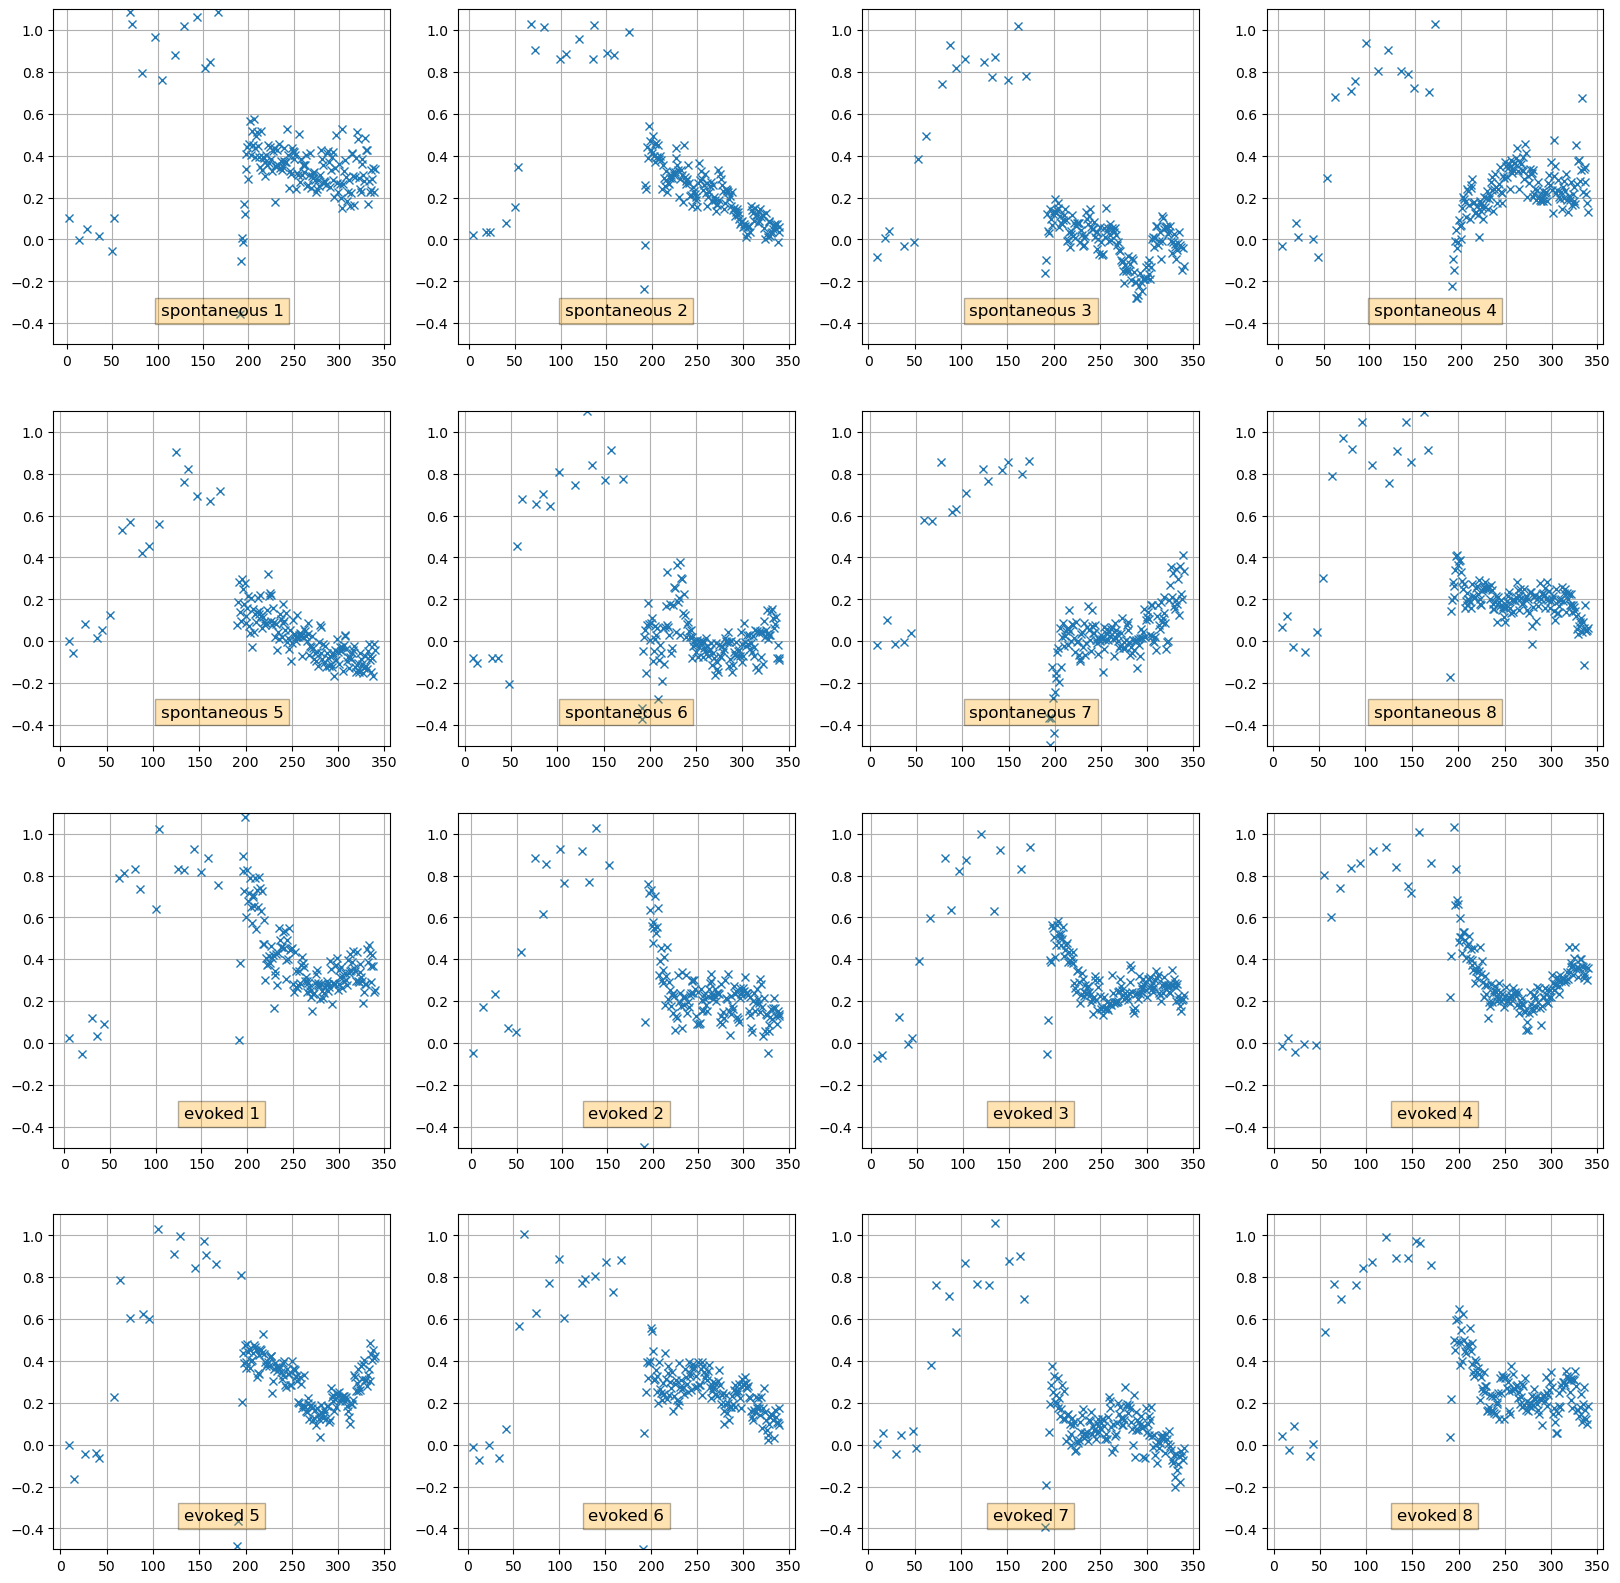

In [21]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-0.5,1.1])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

In [22]:
all_ys = {paradigm:np.array(all_ys[paradigm]) for paradigm in paradigms}

/tmp/ipykernel_2731038/2401955991.py:1: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
/tmp/ipykernel_2731038/2401955991.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')


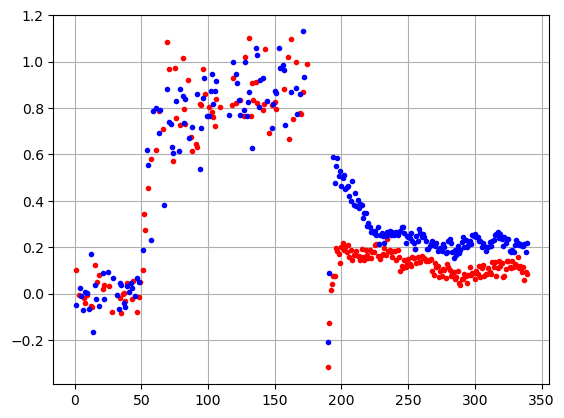

In [23]:
plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')
plt.grid()

In [24]:
#save mean data to csv file
#create x vector for each of the two paradigms
y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)
x_spontaneous = np.arange(y_mean_spontaneous.shape[0])
x_evoked = np.arange(y_mean_evoked.shape[0])
np.savetxt(f'{PROJ_ROOT}/experimental/coin_spontaneous_mean.csv', np.concatenate([x_spontaneous, y_mean_spontaneous]).reshape(2,-1).T, delimiter=',')
np.savetxt(f'{PROJ_ROOT}/experimental/coin_evoked_mean.csv', np.concatenate([x_evoked, y_mean_evoked]).reshape(2,-1).T, delimiter=',')

/tmp/ipykernel_2731038/3258408457.py:3: RuntimeWarning: Mean of empty slice
  y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
/tmp/ipykernel_2731038/3258408457.py:4: RuntimeWarning: Mean of empty slice
  y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)


/tmp/ipykernel_2731038/2356130439.py:1: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
/tmp/ipykernel_2731038/2356130439.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')


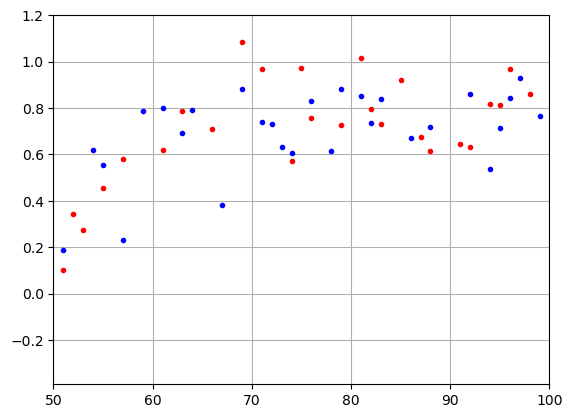

In [25]:
plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')
plt.xlim([50,100])
plt.grid()

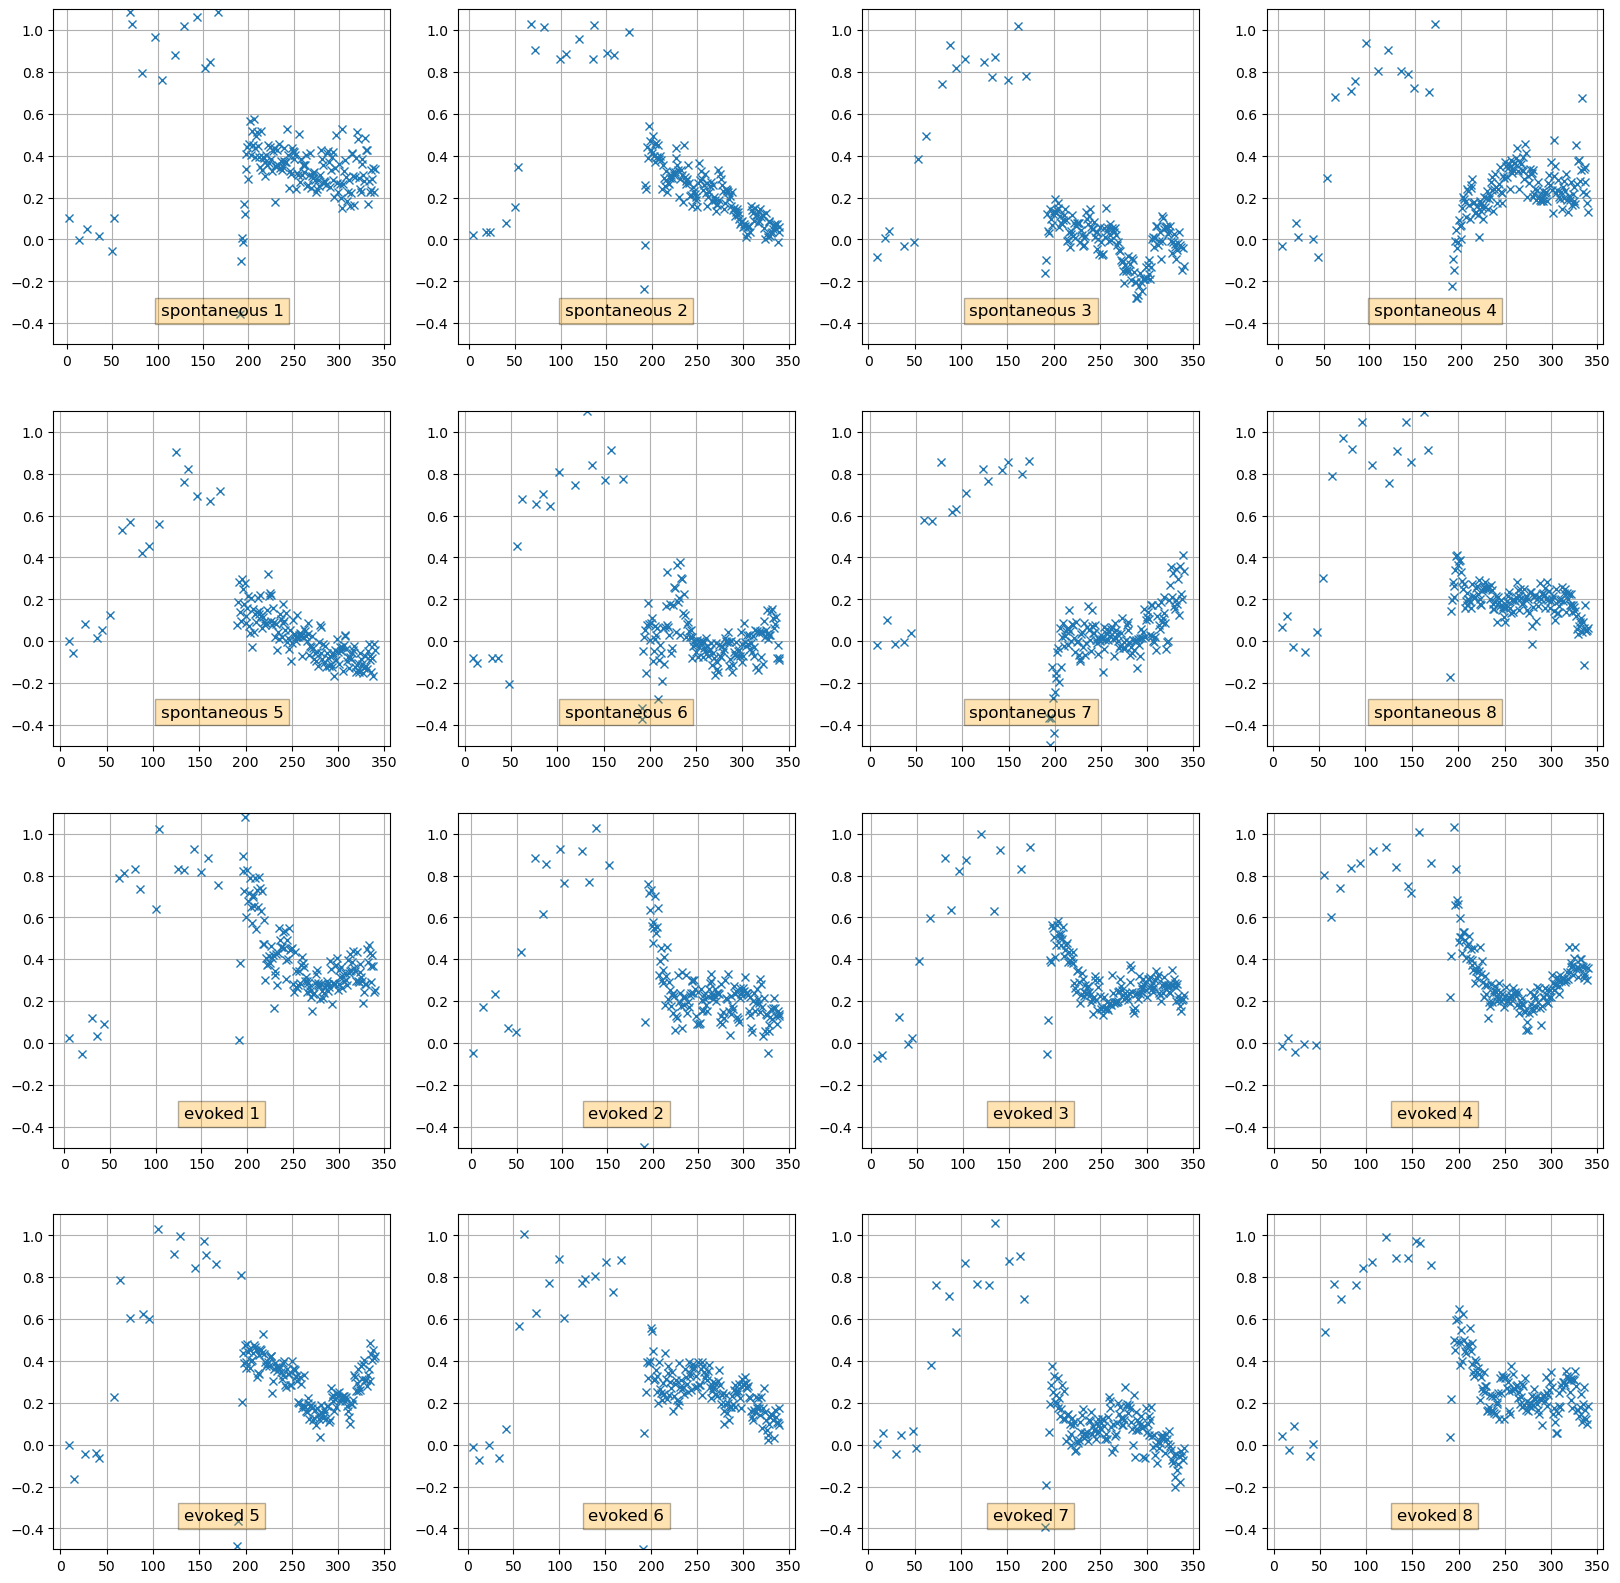

In [26]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-0.5,1.1])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

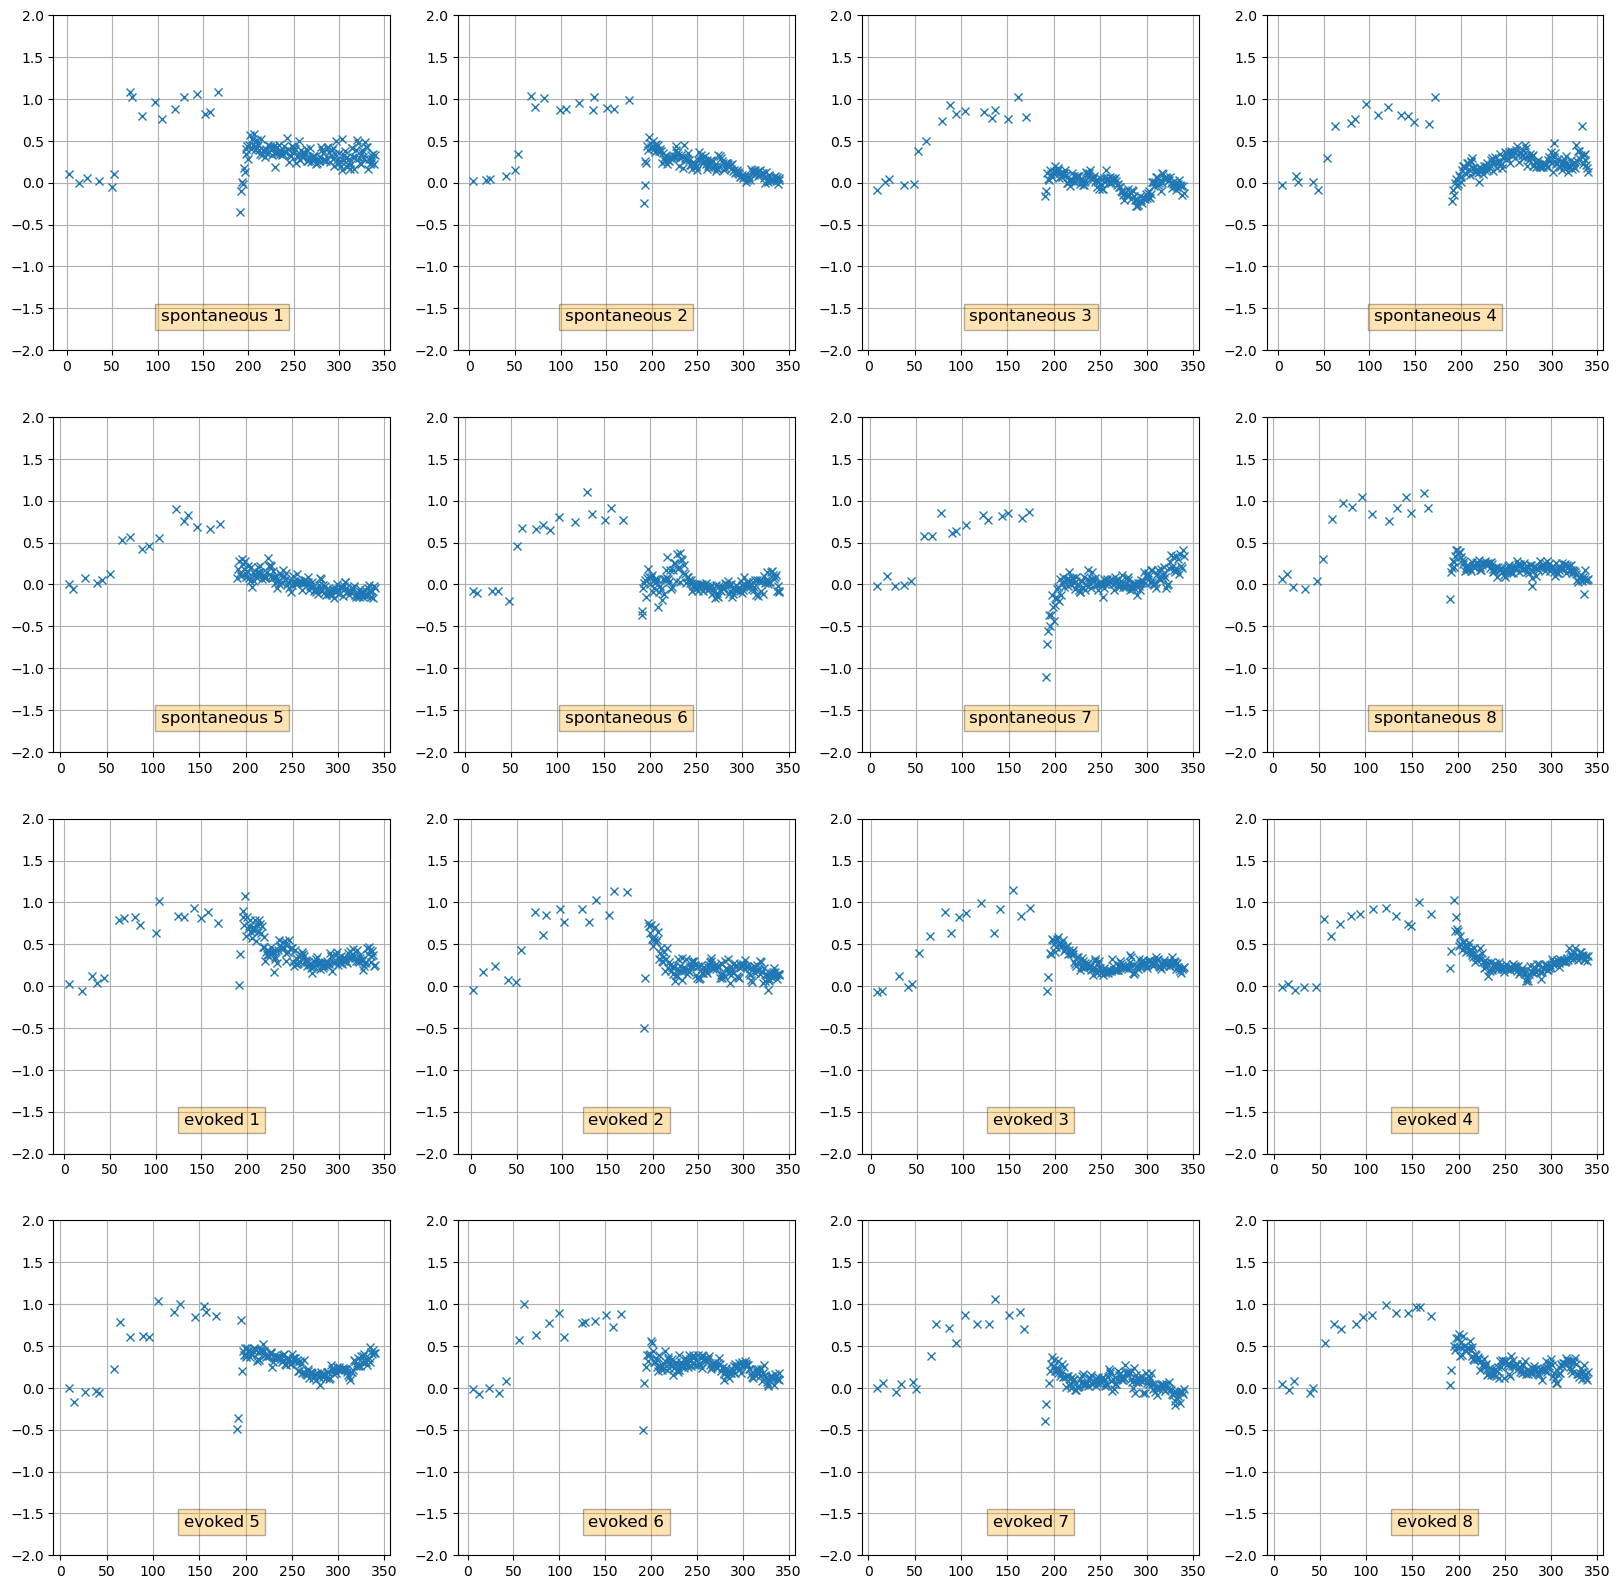

In [27]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-2,2])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

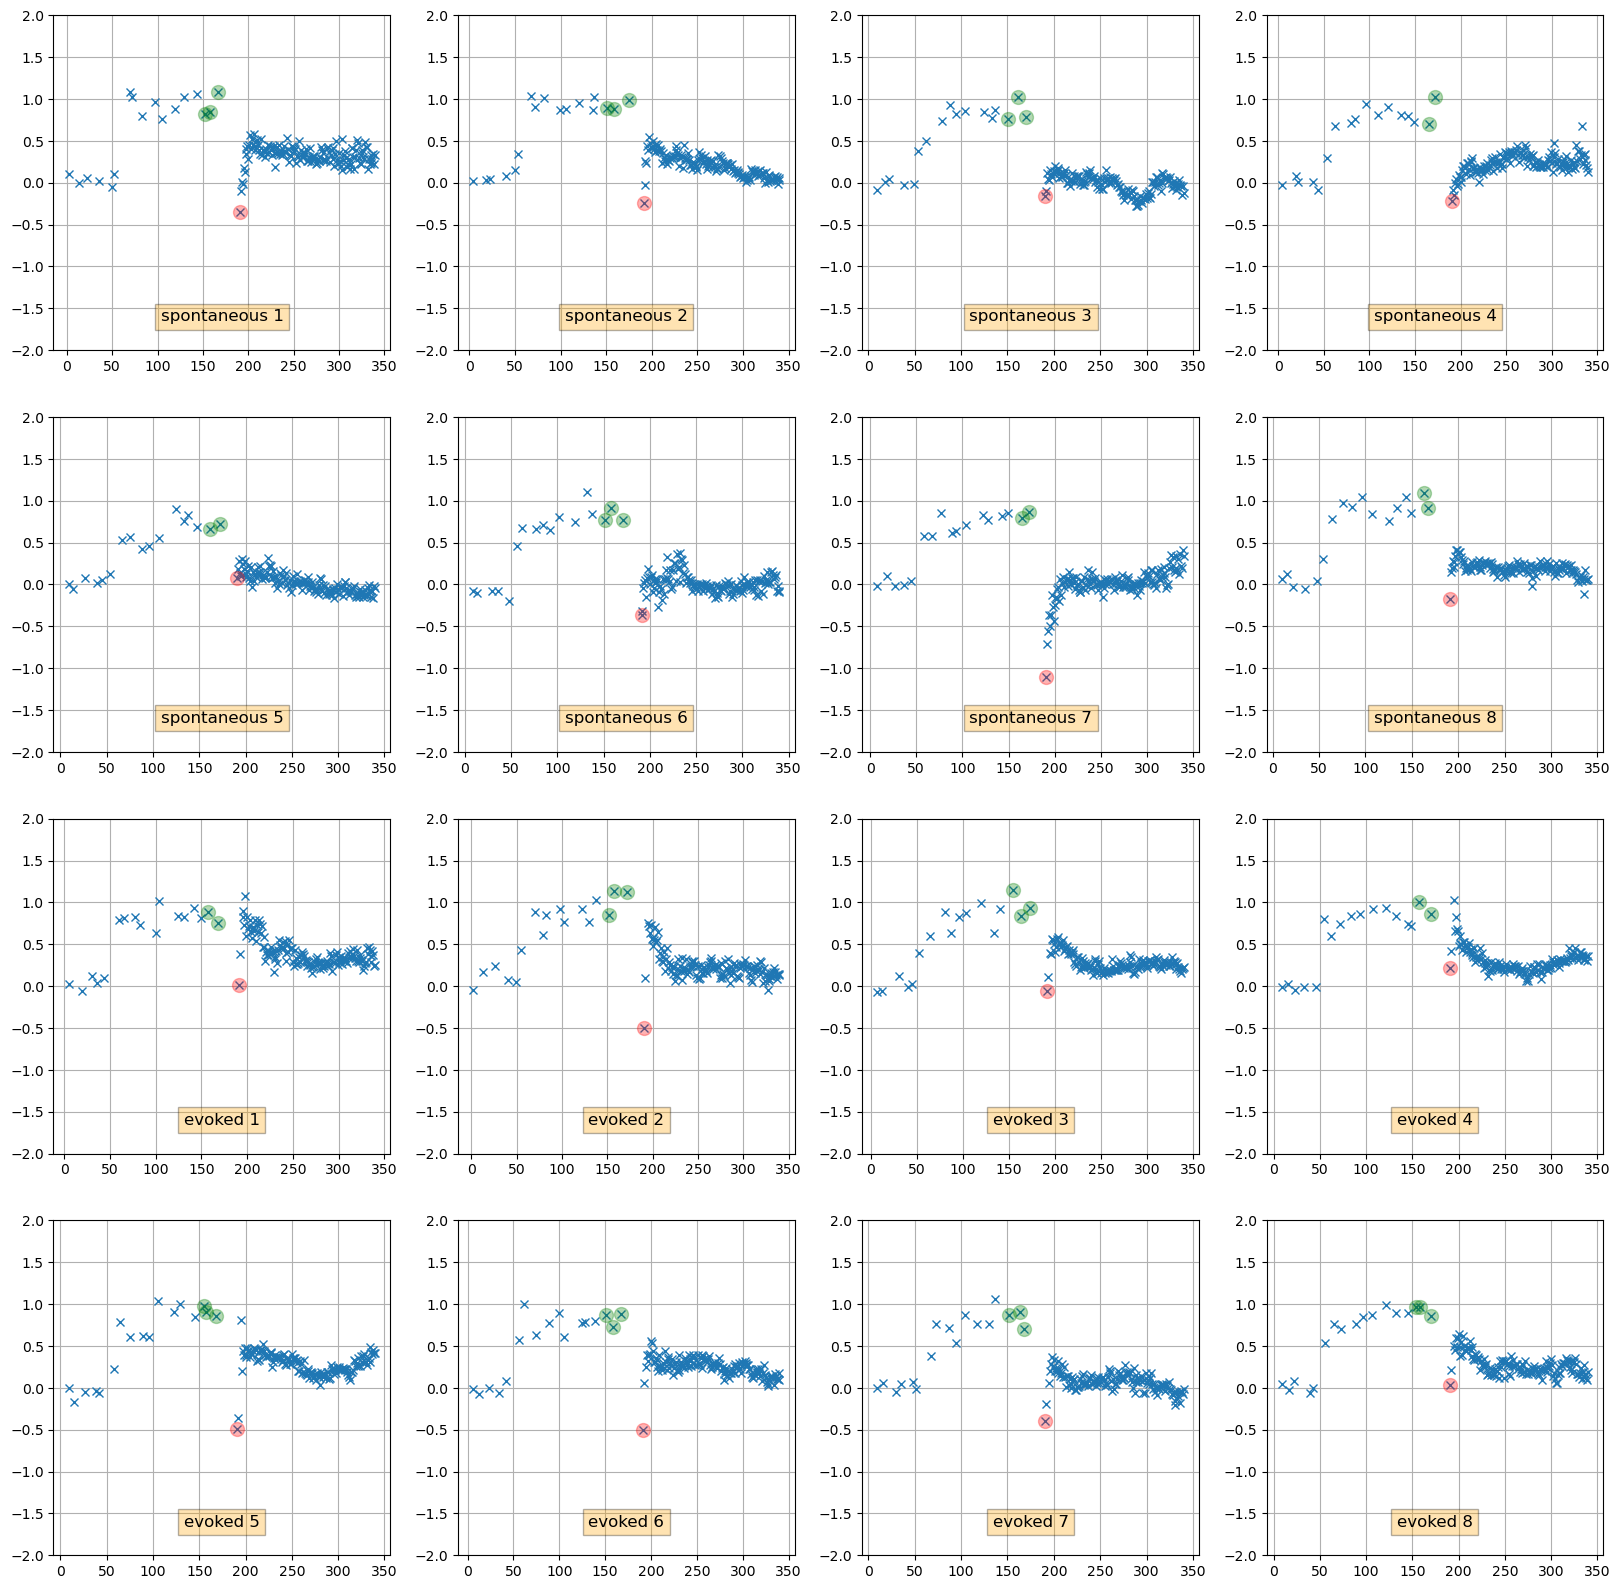

In [33]:
cnt = 1
sat_adapt_rec = []
anter_rec = []
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')


        sat_adapt_x, sat_adapt_y = x[150:190], y[150:190]
        anter_x, anter_y = x[190], y[190]
        
        plt.plot(anter_x, anter_y,'ro',alpha=0.3, markersize=10)  # mark the 190th trial
        plt.plot(sat_adapt_x, sat_adapt_y,'go',alpha=0.3, markersize=10)  # mark the 190th trial
        sat_adapt_rec.append(np.nanmean(sat_adapt_y))
        anter_rec.append(anter_y)
        plt.ylim([-2,2])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

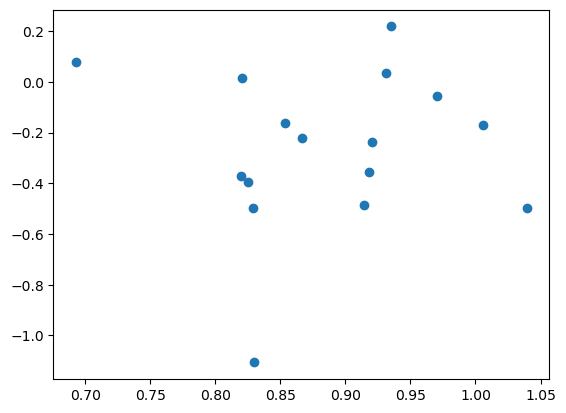

In [36]:
plt.plot(sat_adapt_rec, anter_rec ,'o')

In [38]:
from scipy.stats import pearsonr,spearmanr
corr, p_value = pearsonr(sat_adapt_rec, anter_rec)
print(f'Pearson correlation between sat_adapt_rec and anter_rec: {corr}, p-value: {p_value}')

corr, p_value = spearmanr(sat_adapt_rec, anter_rec)
print(f'Spearman correlation between sat_adapt_rec and anter_rec: {corr}, p-value: {p_value}')

Pearson correlation between sat_adapt_rec and anter_rec: 0.02406855340141245, p-value: 0.9294978533795188
Spearman correlation between sat_adapt_rec and anter_rec: 0.0588235294117647, p-value: 0.8286807500332258


/tmp/ipykernel_2731038/3304635234.py:1: RuntimeWarning: Mean of empty slice
  y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
/tmp/ipykernel_2731038/3304635234.py:2: RuntimeWarning: Mean of empty slice
  y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)


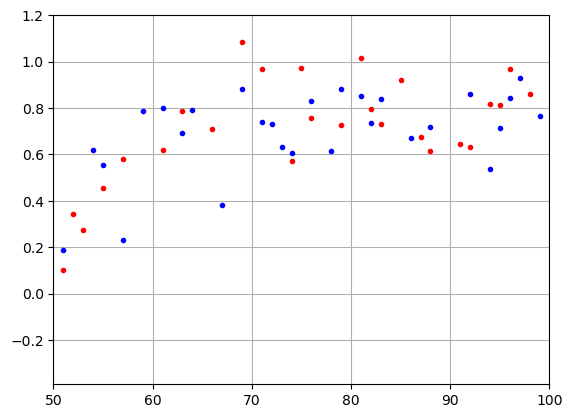

In [39]:
y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)
x_spontaneous = np.arange(y_mean_spontaneous.shape[0])
x_evoked = np.arange(y_mean_evoked.shape[0])

plt.plot(x_spontaneous, y_mean_spontaneous,'r.')
plt.plot(x_evoked, y_mean_evoked,'b.')
plt.xlim([50,100])
plt.grid()

plt.show()